## 探索核函数在不同数据集上的表现

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles,make_moons, make_blobs,make_classification
%matplotlib inline

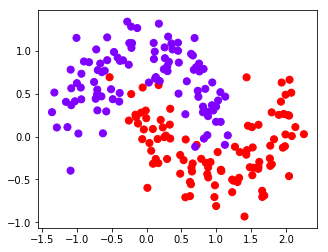

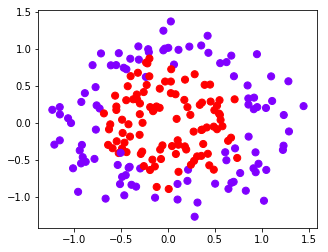

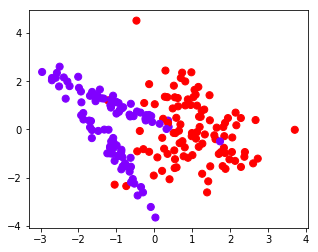

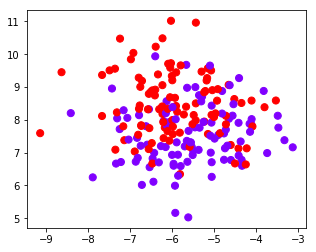

In [25]:
n_samples = 200
datasets = [
    make_moons(n_samples=n_samples,noise=0.2,random_state=0),
    make_circles(n_samples=n_samples, noise=0.2,factor=0.5,random_state=1),
    make_classification(n_samples=n_samples, n_features=2,n_informative=2,
                       n_redundant=0, random_state=5),
    make_blobs(n_samples=n_samples,centers=2, random_state=5)
]
Kernel = ["linear","poly","rbf"]
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y, s=50, cmap="rainbow")

  创建子图

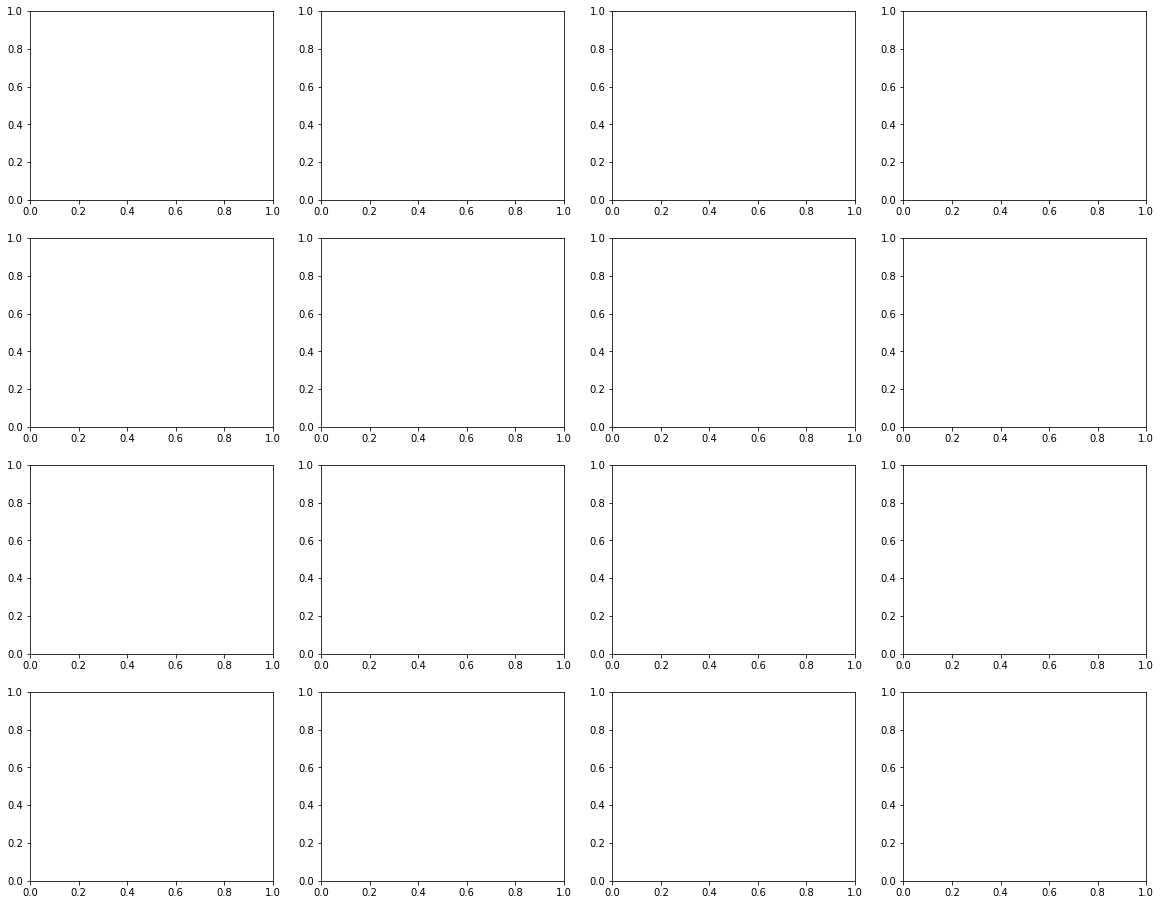

In [26]:
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

开始进行子图循环

In [27]:
%matplotlib inline
%pylab inline
#第一层循环：在不同的数据集中循环

for ds_cnt, (X,Y) in enumerate(datasets):
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
            ,zorder=10
            ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
        facecolors='none', zorder=10, edgecolors='k')
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
            , size=15
            , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
            #为分数添加一个白色的格子作为底色
            , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
            , horizontalalignment='right' #位于坐标轴的什么方向
               )


plt.tight_layout()
plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'time', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: 'function' object is not subscriptable

## 探索核函数的优势和缺陷

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime


In [29]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [30]:
X = data.data
y = data.target

In [31]:
X.shape

(569, 30)

In [32]:
np.unique(y)

array([0, 1])

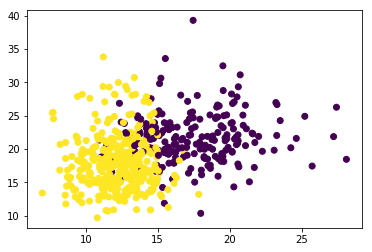

In [33]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state = 420)

In [39]:
Kernel = ["linear","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
             gamma= "auto",
             degree = 1,
             cache_size=5000
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:493678
The accuracy under kernel rbf is 0.596491
00:00:045910
The accuracy under kernel sigmoid is 0.596491
00:00:005009


In [38]:
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
        , gamma="auto"
        , degree = 1
        , cache_size=5000
        ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:490719
The accuracy under kernel poly is 0.923977
00:00:096742
The accuracy under kernel rbf is 0.596491
00:00:045907
The accuracy under kernel sigmoid is 0.596491
00:00:005952


In [40]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [41]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
        , gamma="auto"
        , degree = 1
        , cache_size=5000
        ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:009973
The accuracy under kernel poly is 0.964912
00:00:004020
The accuracy under kernel rbf is 0.970760
00:00:006950
The accuracy under kernel sigmoid is 0.953216
00:00:004987


In [42]:
#  SVM 的 gamma_range 值的调参过程

0.9766081871345029 0.012067926406393264


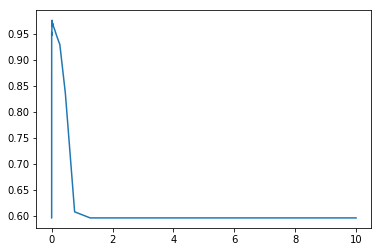

In [44]:
score = []
gamma_range = np.logspace(-10,1,50)   # 返回在对数刻度上 均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

    通过学习曲线，很容就找出了rbf的最佳gamma值。但我们观察到，这其实与线性核函数的准确率一模一样之前的
准确率。我们可以多次调整gamma_range来观察结果，可以发现97.6608应该是rbf核函数的极限了。

    但对于多项式核函数来说，一切就没有那么容易了，因为三个参数共同作用在一个数学公式上影响它的效果，因此
我们往往使用网格搜索来共同调整三个对多项式核函数有影响的参数。依然使用乳腺癌数据集

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)
gamma_range

array([1.00000000e-10, 3.79269019e-10, 1.43844989e-09, 5.45559478e-09,
       2.06913808e-08, 7.84759970e-08, 2.97635144e-07, 1.12883789e-06,
       4.28133240e-06, 1.62377674e-05, 6.15848211e-05, 2.33572147e-04,
       8.85866790e-04, 3.35981829e-03, 1.27427499e-02, 4.83293024e-02,
       1.83298071e-01, 6.95192796e-01, 2.63665090e+00, 1.00000000e+01])

In [46]:
coef0_range

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [48]:
param_grid = dict(gamma = gamma_range,
                 coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000),
                   param_grid=param_grid, cv=cv)
grid.fit(X,y)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_,
grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
03:06:520981


In [49]:
#  调用现行核函数 

0.9766081871345029 1.2340816326530613


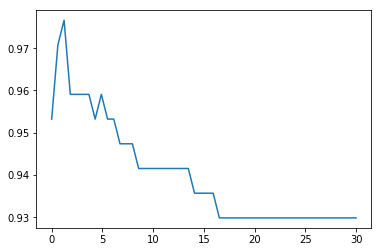

In [52]:
score = []
C_range = np.linspace(0.01, 30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()


0.9824561403508771 6.130408163265306


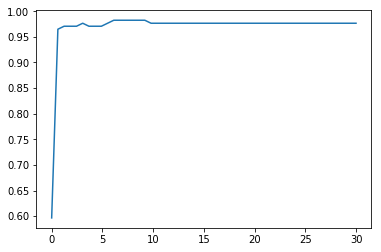

In [53]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma =
    0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.947368421052632


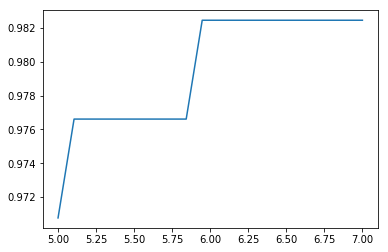

In [54]:
#  进一步细化
score = []
C_range = np.linspace(5,7,20)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma=0.0127427,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()